In [90]:
import math
import numpy as np
import pandas as pd
from functools import reduce
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from matplotlib.backends.backend_pdf import PdfPages

In [91]:
pd.set_option('chained_assignment', None)

In [92]:
df = pd.read_csv('C:/Users/lzoeckler/Desktop/for_allison/PID_update_clean.csv')
end_df = df.copy(deep=True)
df.head()

,result,IgG,IgG_IgA_IgM
0,0,570.0,582.0
1,0,608.0,620.0
2,0,780.4,794.8
3,0,1005.0,1017.0
4,0,913.6,1041.9


In [93]:
IgG_data = df['IgG'].values
combined_data = df['IgG_IgA_IgM'].values
test_vals = df['result']
binary_data = test_vals.values.reshape(-1, 1)

In [94]:
clf_IgG = linear_model.LogisticRegression(random_state=0)
clf_IgG.fit(IgG_data.reshape(-1, 1), binary_data)
probabilities = clf_IgG.predict_proba(IgG_data.reshape(-1,1))
end_df['probability_of_1_IgG_based'] = probabilities[:, 1]

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
clf_combined = linear_model.LogisticRegression(random_state=0)
clf_combined.fit(combined_data.reshape(-1, 1), binary_data)
probabilities = clf_combined.predict_proba(combined_data.reshape(-1,1))
end_df['probability_of_1_combined_based'] = probabilities[:, 1]

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
pp = PdfPages('C:/Users/lzoeckler/Desktop/for_allison/logistic_update_full.pdf')

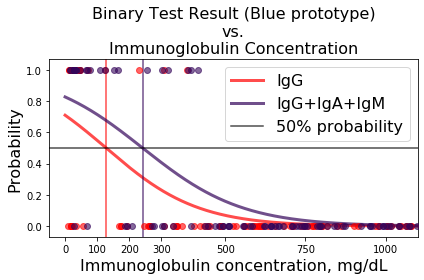

In [109]:
f = plt.figure()
# IgG
plt.scatter(IgG_data, binary_data, color='r', zorder=20, alpha=0.6)
X_test = np.linspace(0, 2000, 300000)
loss = expit(X_test * clf_IgG.coef_ + clf_IgG.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3, alpha=0.7,
         label='IgG')
IgG_prob = ((0 - clf_IgG.intercept_) / clf_IgG.coef_).item()
plt.axvline(IgG_prob, color='r', alpha=0.7)#, label='50% probability')
# Combined
plt.scatter(combined_data, binary_data, color='#34055A', zorder=20, alpha=0.6)
X_test = np.linspace(0, 2000, 300000)
loss = expit(X_test * clf_combined.coef_ + clf_combined.intercept_).ravel()
plt.plot(X_test, loss, color='#34055A', linewidth=3, alpha=0.7,
         label='IgG+IgA+IgM')
com_prob = ((0 - clf_combined.intercept_) / clf_combined.coef_).item()
plt.axvline(com_prob, color='#34055A', alpha=0.7)#, label='50% probability')
# Generic
plt.axhline(0.5, color='k', alpha=0.7, label='50% probability')
plt.ylabel('Probability', fontsize=16)
plt.xlabel('Immunoglobulin concentration, mg/dL', fontsize=16)
plt.xlim(-50, 1100)
plt.xticks([0, 100, 200, 300, 500, 750, 1000])
plt.legend(loc=1, fontsize=16)
plt.title('Binary Test Result (Blue prototype)\nvs.\nImmunoglobulin Concentration', fontsize=16)
plt.tight_layout()
plt.show()
pp.savefig(f)
plt.close()

In [110]:
pp.close()